#### 1.
Please upload the data set and check its shape, data types and the first few rows.


#### 2.
Please answer the following questions using the data from the *shoppers.csv* file:

- what percentage of customers used the promotional code when purchasing?
- what items are most frequently purchased by customers?
- what product do men and women buy most often?
- do different product categories sell each season?
- or people over 30 years of age do they buy less clothes than people below?
- what products are most often ordered by *express* shipping?
- do "older" people pay cash more often?

#### 3.
Please present in charts:
- distribution of ratings given by customers;
- which type of shipping is preferred by customers;
- what is the relationship between the purchase price and the rating.

It is sometimes worth adding a comment to tasks - sometimes it is even necessary if the data indicates something unclear, not "one-size-fits-all". If you have an interesting observation - e.g. more jackets are sold in summer etc. it's worth writing about it.


One aspect of evaluation is the order of the file and the ability for me to run all the code at once.






Dataset description:

📌 Customer ID - a unique customer identifier.

📌 Age - the age of the client.

📌 Gender - client's gender (Male/Female).

📌 Item Purchased - item purchased by the customer.

📌 Category - the category of the item purchased by the customer.

📌 Purchase Amount (USD) - purchase amount in US dollars in USD.

📌 Location - location of purchase.

📌 Size - purchase size.

📌 Color - the color of your purchase.

📌 Season - the season for which the purchase was made.

📌 Review Rating - a rating given by the customer regarding the purchase.

📌 Subscription Status - informs whether the customer had a subscription (Yes/No).

📌 Shipping Type - shipping type selected by the customer.

📌 Discount Applied - information about whether a discount was applied to the purchase (Yes/No).

📌 Promo Code Used - information about whether the promotional code has been used (Yes/No).

📌 Previous Purchases - the number of previous purchases made by the customer.

📌 Payment Method - the customer's most preferred form of payment.

📌 Frequency of Purchases - the frequency with which the customer buys (e.g., Weekly, Fortnightly, Monthly).

In [56]:
import pandas as pd
data = pd.read_csv('shoppers.csv')
print(data)
print()
print(f"Data shape: {data.shape}")
print()
print(f"Data shape: {data.dtypes}")

      Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2                        73  Massachusetts   

In [35]:
#1 question

promo_code_count = 0
total_count = 0

promo = data["Promo Code Used"]
total_count = promo.count()
if 'Yes' in promo.values:
  promo_code_count +=1

promo_code_percentage = (promo_code_count / total_count) * 100
print(f"Percentage of people who use promo code: {promo_code_percentage}%")

Percentage of people who use promo code: 0.02564102564102564%


In [38]:
#2 question

most_common_item = data[data.columns[3]].mode().iloc[0]

print(f"The most frequently purchased item is '{most_common_item}' with a quantity of {data[data[data.columns[3]] == most_common_item].shape[0]}.")

The most frequently purchased item is 'Blouse' with a quantity of 171.


In [45]:
#3 question

products = {}

for index, row in data.iterrows():
  gender = row['Gender']
  product = row['Item Purchased']

  if gender not in products:
    products[gender] = {}

  if product not in products[gender]:
    products[gender][product] = 0
  products[gender][product] += 1

for gender, product_dict in products.items():
  most_bought_product = max(product_dict, key=product_dict.get)
  quantity = product_dict[most_bought_product]
  print(f'The most bought product by {gender} is {most_bought_product} with a quantity of {quantity}')

The most bought product by Male is Pants with a quantity of 123
The most bought product by Female is Blouse with a quantity of 66


In [46]:
#4 question

categories_sold = {}
most_popular_items = {}

for index, row in data.iterrows():
        category = row[4]
        season = row[9]

        if (category, season) in categories_sold:
            categories_sold[(category, season)] += 1
        else:
            categories_sold[(category, season)] = 1

        item = row[3]
        if (season, item) in most_popular_items:
          most_popular_items[(season, item)] += 1
        else:
          most_popular_items[(season, item)] = 1

print("Most purchased categories by season")
for (category, season), quantity in categories_sold.items():
    print(f"Category: {category}, Season: {season}, Quantity: {quantity}")

print()
print("Most popular items purchased by season")

for (season, item), quantity in most_popular_items.items():
    if quantity == max([v for k, v in most_popular_items.items() if k[0] == season]):
        print(f"Season: {season}, Most Popular Item: {item}, Quantity: {quantity}")

Most purchased categories by season
Category: Clothing, Season: Winter, Quantity: 448
Category: Clothing, Season: Spring, Quantity: 454
Category: Footwear, Season: Spring, Quantity: 163
Category: Footwear, Season: Summer, Quantity: 160
Category: Clothing, Season: Fall, Quantity: 427
Category: Outerwear, Season: Summer, Quantity: 75
Category: Accessories, Season: Spring, Quantity: 301
Category: Footwear, Season: Fall, Quantity: 136
Category: Outerwear, Season: Winter, Quantity: 80
Category: Clothing, Season: Summer, Quantity: 408
Category: Outerwear, Season: Fall, Quantity: 88
Category: Accessories, Season: Fall, Quantity: 324
Category: Accessories, Season: Winter, Quantity: 303
Category: Outerwear, Season: Spring, Quantity: 81
Category: Accessories, Season: Summer, Quantity: 312
Category: Footwear, Season: Winter, Quantity: 140

Most popular items purchased by season
Season: Summer, Most Popular Item: Pants, Quantity: 50
Season: Fall, Most Popular Item: Jacket, Quantity: 54
Season: Win

In [51]:
#5 question

over_30_clothing = 0
below_30_clothing = 0

for index, row in data.iterrows():
    age = row['Age']
    category = row['Category']

    if age > 30 and category == 'Clothing':
        over_30_clothing += 1
    elif age <= 30 and category == 'Clothing':
        below_30_clothing += 1

if over_30_clothing > below_30_clothing:
    print(f"People over 30 buy more Clothing ({over_30_clothing} items) than those below 30 ({below_30_clothing} items).")
elif over_30_clothing < below_30_clothing:
    print(f"People below 30 buy more Clothing ({below_30_clothing} items) than those over 30 ({over_30_clothing} items).")
else:
    print("People over and below 30 buy the same amount of Clothing.")

People over 30 buy more Clothing (1301 items) than those below 30 (436 items).


In [52]:
#6 question

express_orders = {}

for index, row in data.iterrows():
    item_purchased = row[3]
    shipping_type = row[12]

    if shipping_type == 'Express':
        if item_purchased in express_orders:
           express_orders[item_purchased] += 1
    else:
           express_orders[item_purchased] = 1

most_ordered_express = max(express_orders, key=express_orders.get)
print(f"The most often ordered product by 'Express' shipping is: {most_ordered_express}")

The most often ordered product by 'Express' shipping is: Sandals


In [53]:
#7 question

cash_count_older = 0
cash_count_younger = 0

for index, row in data.iterrows():
    age = row['Age']
    payment_method = row['Payment Method']

    if age > 60 and payment_method == 'Cash':
       cash_count_older += 1
    elif age <= 60 and payment_method == 'Cash':
       cash_count_younger += 1

if cash_count_older > cash_count_younger:
    print(f"People over 60 pay more with cash ({cash_count_older} times) than those below 60 ({cash_count_younger} times).")
elif cash_count_older < cash_count_younger:
    print(f"People below 60 pay more with cash ({cash_count_younger} times) than those over 60 ({cash_count_older} times).")
else:
    print("People over and below 60 pay with cash the same amount of times.")


People below 60 pay more with cash (538 times) than those over 60 (132 times).


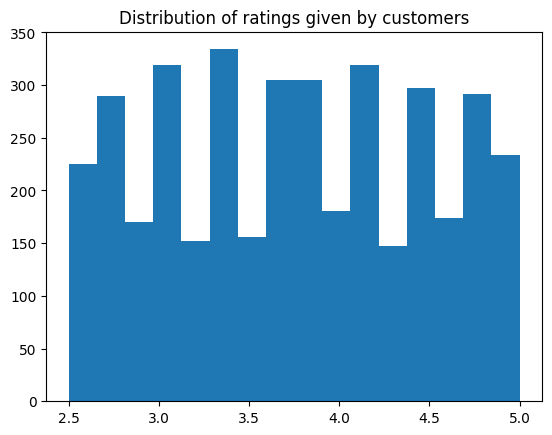

In [82]:
#Distribution of rating

import matplotlib.pyplot as plt

ratings = data["Review Rating"]
plt.hist(ratings, bins='auto')
plt.title("Distribution of ratings given by customers")
plt.savefig('ratingDistrHist.png')

Total payments: 3900
The most preffered payment method is 'PayPal' with a frequency of 677.



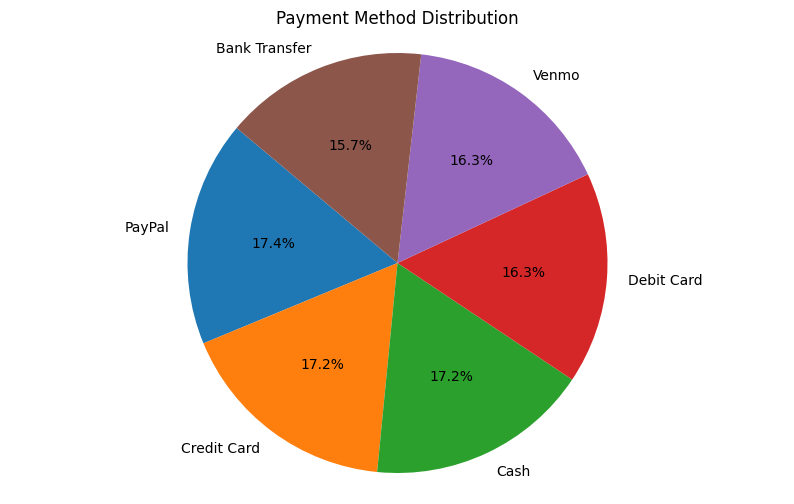

<Figure size 640x480 with 0 Axes>

In [81]:
#Most preffered shipping type

all_pm = data["Payment Method"]
total_count = all_pm.count()
print(f'Total payments: {total_count}')

most_common_pm = data[data.columns[-2]].mode().iloc[0]

print(f"The most preffered payment method is '{most_common_pm}' with a frequency of {data[data[data.columns[-2]] == most_common_pm].shape[0]}.")
print()

#PIE CHART
payment_methods = data["Payment Method"].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(payment_methods, labels=payment_methods.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Payment Method Distribution')
plt.show()
plt.savefig('PaymentMethodFrequenciesPie.png')

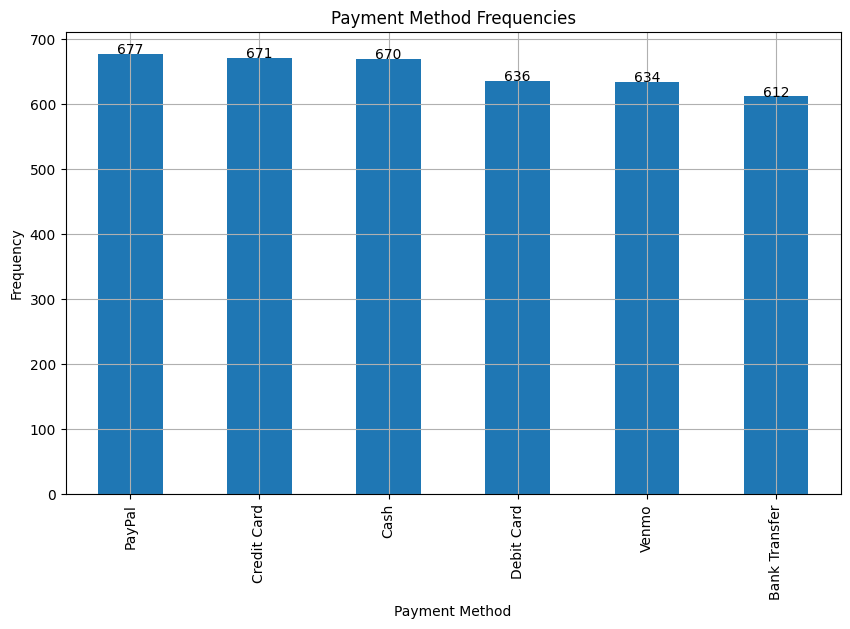

<Figure size 640x480 with 0 Axes>

In [80]:
#BAR CHART
plt.figure(figsize=(10, 6))
ax = all_pm.value_counts().plot(kind='bar')
plt.title('Payment Method Frequencies')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.grid()

for i in range(len(all_pm.value_counts())):
  plt.text(i, all_pm.value_counts()[i], all_pm.value_counts()[i], ha = 'center')

plt.show()
plt.savefig('PaymentMethodFrequenciesBar.png')

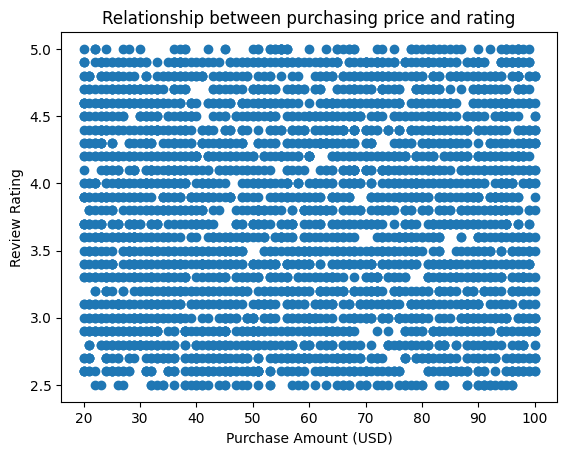

<Figure size 640x480 with 0 Axes>

In [78]:
#Relationship between purchasing price and rating

price = data['Purchase Amount (USD)']
rating = data['Review Rating']

plt.scatter(price, rating)

plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Review Rating")
plt.title("Relationship between purchasing price and rating")

plt.show()
plt.savefig('priceVSrating.png')